# Introduction

NumPy, short for Numerical Python, is the fundamental package required for high performance scientific computing and data analysis. It is the foundation on which nearly all of the higher-level tools in this book are built. Here are something it provides:

1. __ndarray__, a fast and space-efficient multidimensional array providing vectorized arithmetic operations and sophisticated broadcasting capabilities
1. __Standard mathematical functions__ for fast operations on entire arrays of data without having to write loops
1. __Tools for reading / writing array data to disk__ and __working with memory-mapped files__
1.__ Linear algebra, random number generation, and Fourier transform capabilities__
1. __Tools for integrating code written in C, C++, and Fortran__(most important)

### Why Learning Numpy?
- having an understanding of NumPy arrays and array-oriented computing will help you use tools like pandas much more effectively

The following functions will be the main focuses:
1. __Fast vectorized array operations__ for data munging and cleaning, subsetting and filtering, transformation, and any other kinds of computations
1. __Common array algorithms__ like sorting, unique, and set operations
1. __Efficient descriptive statistics__ and aggregating/summarizing data
1. __Data alignment__ and __relational data manipulations__ for merging and joining together heterogeneous data sets
1. __Expressing conditional logic as array expressions__ instead of loops with if-elif-else branches
1. __Group-wise data manipulations__ (aggregation, transformation, function application)

In [2]:
import numpy as np
from numpy import random

## The NumPy ndarray: A Multidimensional Array Object

- An ndarray is a generic multidimensional container for homogeneous data (all data should be in the same type)
- __data.shape__: Every array has a shape, a tuple indicating the size of each each dimension e.g. (2,3)
- __data.dtype__: an object describing the data type of the array


## Creating ndarrays
- The easiest way to create an array is to use the array function
- This accepts any sequence-like object (including other arrays) and produces a new NumPy array containing the passed data

In [4]:
# Create a single array
data1 = [6, 7.5, 8, 0, 1]
arr1 =np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [5]:
# Create a Nested sequence, like a list of equal-length lists
# will be converted into a multi-dimensional array
data2 = [[1,2,3,4],[5,6,7,8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [6]:
# Check the number of dimension
arr2.ndim

2

In [7]:
# Check the shape of the array
arr2.shape

(2, 4)

In [8]:
# Check the type of data within the array
# because the data type is stored in a special dtype object
arr1.dtype

dtype('float64')

In [9]:
arr2.dtype

dtype('int64')

In addition to np.array, there are a number of other functions for creating new arrays
- __zeros__ create arrays of 0's (with a given length or shape)
- __ones__ create arrays of 1's (with a given length or shape)
- __empty__ create an array without intializing its values to any particular value (unintialized gargage values)

In [10]:
# Create array of 0's, given the length
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
# Create array of 0's, given the shape
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [12]:
# Create array by using empty, the third argument = number of array
np.empty((2,3,2))

array([[[-1.28822975e-231,  1.49457945e-154],
        [ 2.96439388e-323,  4.94065646e-324],
        [ 0.00000000e+000,  6.82116581e-043]],

       [[ 0.00000000e+000,  1.36988752e-071],
        [ 0.00000000e+000,  1.65748267e-047],
        [ 0.00000000e+000,  8.38745401e-309]]])

- __arange__ is an array-valued version of the built-in Python range function:

In [13]:
# using the arange
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## Summary of array creation function

In [15]:
%%html
<img src='image/array_creation.jpg', width: 50, height: 50>

## Data Types for ndarrays
- The data type or dtype is a special object containing the information the ndarray needs to __interpret a chunk of memory__ as a particular type of data:

In [16]:
# Create ndarray with dtype specified
arr1 = np.array([1,2,3], dtype=np.float64)
arr2 = np.array([1,2,3], dtype=np.float32)

In [17]:
arr1.dtype

dtype('float64')

In [18]:
arr2.dtype

dtype('float32')

## Why Dtypes are important to NumPy?
- they map directly onto an underlying machine representation, which makes it __easy to read and write binary streams of data to disk__ and also to __connect to code written in a low-level language__ like C or Fortran


In [19]:
%%html
<img src='image/numpy_data_type.jpg', width: 50, height: 50>
# It is only needed when  you need more control over how data are stored in memory and on disk, especially large data sets. 

In [20]:
# Convert an array from one type to another type, __astype__
arr = np.array([1,2,3,4,5])

In [21]:
arr.dtype

dtype('int64')

In [22]:
float_arr = arr.astype(np.float64)

In [23]:
float_arr.dtype

dtype('float64')

In [24]:
# when we convert float to int, the decimal places will disappear
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])

In [25]:
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [26]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [27]:
# If I have an array of strings representing numbers, I can perform the conversion via astype
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)

In [28]:
numeric_strings.dtype

dtype('S4')

In [29]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [32]:
# Align two ndarray to the same type
int_array = np.arange(10)
calibers = np.array([.22,.270,.357,.380,.44,.50], dtype=np.float64)
int_array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

__<font color=orange> Keeping in mind that floating point numbers, such as those in float64 and float32 arrays, are only capable of approximating fractional quantities. In complex computations, you may accrue some floating point error, making comparisons only valid up to a certain number of decimal places.</font>__

## Operations between Arrays and Scalars
- Arrays are important because they enable you to __express batch operations__ on data __without writing any for loops__
- It is called __vectorization__
- Any arithmetic operations between __equal-size arrays__ applies the __operation elementwise__:
- Operations between __differently sized arrays__ is called __broadcasting__

In [34]:
arr = np.array([[1.,2.,3.],[4.,5.,6.]])

In [35]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [36]:
# multiplication
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [37]:
# substraction
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

__Arithmetic operations with scalars__ are as you would expect, __propagating the value to each element__:

In [38]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [39]:
arr * 0.5

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

## Basic Indexing and Slicing

In [42]:
# one-dimensional arrays
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
# index
arr[5]

5

In [44]:
# slicing
arr[5:8]

array([5, 6, 7])

In [45]:
# assign value to particular slicing
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

## Differences between list and array
1. Array slices are views on the original array, which means the data is not copied

In [46]:
# 1st difference
arr_slice = arr[5:8]
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [47]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

__<font color=orange> If you want a copy of a slice of an ndarray instead of a view, you will need to explicitly copy the array; for example arr[5:8].copy().</font>__

With higher dimensional arrays, you have many more options. In a __two-dimensional array__, __the elements at each index__ are no longer scalars but rather __one-dimensional arrays__:

In [49]:
# Creation of a 2D array
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [50]:
# Access an element
arr2d[2]

array([7, 8, 9])

In [64]:
# Slicing of 2D array
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [65]:
# Slicing of 2D array in a particular range
arr2d[:2,1:]

array([[2, 3],
       [5, 6]])

In [66]:
# Slicing by mixing integer indexes and slices, you get lower dimensional slices
arr2d[1,:2]

array([4, 5])

In [67]:
arr2d[2, :1]

array([7])

__a colon by itself means to take the entire axis__, so you can slice only higher dimensional axes by doing

In [68]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [69]:
# assigning to a slice expression assigns to the whole section
arr2d[:2, 1:] = 0

In [70]:
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

__individual elements can be accessed recursively__. But that is a bit too much work, so you can pass a comma-separated list of indices to select individual elements.

In [51]:
# Access individual element
arr2d[0][2]

3

In [52]:
arr2d[0 ,2]

3

In [54]:
%%html
<img src='image/indexing_2Darray.jpg', width: 50, height: 50>

In __multidimensional arrays__, if you __omit later indices__, the __returned object__ will be a __lower-dimensional ndarray__ consisting of all the data along the higher dimensions.

In [56]:
arr3d = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [57]:
# arr3d[0] is a 2 x 3 array
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [58]:
# Both scalar values and arrays can be assigned to arr3d[0]:
old_values = arr3d[0].copy()

In [59]:
# assign all values in the 2 x 3 array as 42
arr3d[0] = 42

In [60]:
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [61]:
arr3d[0] = old_values

In [62]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

Similarly, __arr3d[1, 0]__ gives you all of the values whose __indices start with (1, 0), forming a 1-dimensional array__:

In [63]:
# indexing in a 3D array gives a 1D array
arr3d[1,0]

array([7, 8, 9])

# Boolean Indexing

- Let’s consider an example where we have some data in an array and an array of names with duplicates.
-  I’m going to use here the randn function in __numpy.random__ to __generate some random normally distributed data__:

In [78]:
# create random data distribution
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = random.randn(7,4)

In [80]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [81]:
data

array([[ 0.03009113,  0.10543573, -0.46766743,  0.41260056],
       [ 0.72096312, -1.34244075,  0.03361342,  1.40276367],
       [ 0.04856852,  0.74172575,  0.2483203 ,  0.19545692],
       [-0.06867466,  1.17647944,  0.57681562,  1.21842058],
       [ 1.9327875 ,  0.03402718,  0.95873634,  0.23513672],
       [-1.55521375, -0.37976308,  0.2791962 ,  1.72111045],
       [-0.32431372,  0.35574216,  1.04130374, -0.58814502]])

If we wanted to select all the rows with corresponding name 'Bob'. __Like arithmetic operations, comparisons (such as ==) with arrays are also vectorized__. Thus, comparing names with the string 'Bob' __yields a boolean array__:

In [83]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [82]:
# It takes 0th position and 3rd position out, so retreive 0th and 4th row
data[names == 'Bob']

array([[ 0.03009113,  0.10543573, -0.46766743,  0.41260056],
       [-0.06867466,  1.17647944,  0.57681562,  1.21842058]])

In [84]:
# You can even mix and match boolean arrays with slices or integers
data[names == 'Bob', 2:]

array([[-0.46766743,  0.41260056],
       [ 0.57681562,  1.21842058]])

In [85]:
data[names == 'Bob', 3]

array([0.41260056, 1.21842058])

In [87]:
# Select everything but 'Bob'
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [89]:
data[(names != 'Bob')]

array([[ 0.72096312, -1.34244075,  0.03361342,  1.40276367],
       [ 0.04856852,  0.74172575,  0.2483203 ,  0.19545692],
       [ 1.9327875 ,  0.03402718,  0.95873634,  0.23513672],
       [-1.55521375, -0.37976308,  0.2791962 ,  1.72111045],
       [-0.32431372,  0.35574216,  1.04130374, -0.58814502]])

Selecting two of the three names to combine multiple boolean conditions, use boolean arithmetic operators like __& (and)__ and __| (or)__:

In [90]:
# using boolean arithmetic operators like and, or
mask = (names == 'Bob') | (names == 'Will')

In [91]:
mask

array([ True, False,  True,  True,  True, False, False])

In [92]:
data[mask]

array([[ 0.03009113,  0.10543573, -0.46766743,  0.41260056],
       [ 0.04856852,  0.74172575,  0.2483203 ,  0.19545692],
       [-0.06867466,  1.17647944,  0.57681562,  1.21842058],
       [ 1.9327875 ,  0.03402718,  0.95873634,  0.23513672]])

Selecting data from an array by boolean indexing always creates a copy of the data, even if the returned array is unchanged.

__<font color=orange>The Python keywords and and or do not work with boolean arrays.</font>__

In [93]:
# Setting values with boolean arrays, e.g. set all negative in data to 0
data[data < 0] = 0
data

array([[0.03009113, 0.10543573, 0.        , 0.41260056],
       [0.72096312, 0.        , 0.03361342, 1.40276367],
       [0.04856852, 0.74172575, 0.2483203 , 0.19545692],
       [0.        , 1.17647944, 0.57681562, 1.21842058],
       [1.9327875 , 0.03402718, 0.95873634, 0.23513672],
       [0.        , 0.        , 0.2791962 , 1.72111045],
       [0.        , 0.35574216, 1.04130374, 0.        ]])

In [94]:
# Setting whole rows or columns using a 1D boolean array
data[names != 'Joe'] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.72096312, 0.        , 0.03361342, 1.40276367],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.2791962 , 1.72111045],
       [0.        , 0.35574216, 1.04130374, 0.        ]])

## Fancy Indexing
Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays.

In [95]:
arr = np.empty((8,4))

In [96]:
arr

array([[-1.28822975e-231, -1.28822975e-231,  1.13635099e-322,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         2.37899541e+184],
       [-1.28822975e-231, -1.28822975e-231,  8.37170571e-144,
         4.50620816e-144],
       [ 4.27255699e+180,  6.12033286e+257,  3.83819517e+151,
         6.45835088e+170],
       [ 8.23008485e-071,  8.38455686e+165,  2.90455766e+180,
         1.97430782e-308],
       [ 6.94832730e-310,  2.32036050e+077,  0.00000000e+000,
        -1.28822975e-231]])

In [97]:
for i in range(8):
    arr[i] = i

In [98]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To __select out a subset of the rows in a particular order__, you can __simply pass a list or ndarray of integers specifying the desired order__

In [99]:
# positive index = which row
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [100]:
# negative index = rows from the end
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

Passing multiple index arrays does something slightly different; it __selects a 1D array of elements__ corresponding to __each tuple of indices__:

In [5]:
# create an array with reshape
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [6]:
# how to selects a 1D array of elements
# the elements (1, 0), (5, 3), (7, 1), and (2, 2) were selected.
# e.g. 1st row, and 0th column =4

arr[[1 , 5, 7 ,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

In [7]:
# rectangular region formed by selecting a subset of the matrix’s rows and columns
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [8]:
# np.ix_ function, which converts two 1D integer arrays to an indexer that selects the square region
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

## Transposing Arrays and Swapping Axes

In [9]:
# 1. create an array with 3 rows and 5 columns
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [10]:
# 2. transpose to an array with 5 rows and 3 columns
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [11]:
# Transpose can help us to compute inner matrix product
arr = np.random.randn(6,3)
np.dot(arr.T, arr)

array([[ 2.31101909,  2.27496071, -2.38951535],
       [ 2.27496071,  7.9498945 , -3.06008085],
       [-2.38951535, -3.06008085,  4.66203112]])

For higher dimensional arrays, transpose will accept a tuple of axis numbers to permute the axes

In [12]:
# Create a 2D array
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [13]:
# switching rows? 
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

__Simple transposing with .T is just a special case of swapping axes.__ ndarray has the method swapaxes which takes a pair of axis numbers:

In [16]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [17]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast element-wise array function
- A universal function, or ufunc, is a function that __performs elementwise operations on data in ndarrays__.
- fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results

In [19]:
# many ufuncs are simple elementwise transformations (e.g. sqrt or exp)
arr = np.arange(10)
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [20]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [22]:
# unary unfunc, take two aarrays and return a single array
# 1. create two arrays
x = random.randn(8)
y = random.randn(8)

In [23]:
x

array([-0.48774626,  1.18928537, -1.53301398,  0.04467858,  0.87415296,
       -0.71290088,  0.10709601, -0.91705849])

In [24]:
y

array([ 0.50241465,  0.46032232, -1.38861194,  0.77220891,  0.61954318,
       -1.01997349,  0.03024384,  0.3026512 ])

In [25]:
# element-wise maximum = compare every pair
np.maximum(x,y)

array([ 0.50241465,  1.18928537, -1.38861194,  0.77220891,  0.87415296,
       -0.71290088,  0.10709601,  0.3026512 ])

In [26]:
# element-wise add
np.add(x,y)

array([ 0.01466839,  1.64960769, -2.92162592,  0.81688749,  1.49369615,
       -1.73287437,  0.13733984, -0.6144073 ])

In [27]:
# a ufunc can retrun multiple arrays
# example modf: return the fractional and integral part of a floating array
arr = random.randn(7) * 5

In [28]:
arr

array([ 2.24966341,  3.75842679, -6.28113577,  0.03836083,  5.31144022,
        0.61794743,  2.24008657])

In [29]:
np.modf(arr)

(array([ 0.24966341,  0.75842679, -0.28113577,  0.03836083,  0.31144022,
         0.61794743,  0.24008657]), array([ 2.,  3., -6.,  0.,  5.,  0.,  2.]))

### Unary ufuncs

In [30]:
%%html
<img src='image/numpy_function.jpg', width: 50, height: 50>

### binary universal fucntion (take two array as inputs)

In [31]:
%%html
<img src='image/numpy_binary_universal_function.jpg', width: 50, height: 50>

## Data Processing Using Arrays
- This practice of replacing explicit loops with array expressions is commonly referred to as __vectorization__
- vectorized array operations will often be __one or two (or more) orders of magnitude faster than their pure Python equivalents__, with the biggest impact in any kind of numerical computations.

In [33]:
# example: np.meshgrid function takes two 1D arrays and produces two 2D matrices
points = np.arange(-5,5,0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)

In [34]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

evaluating the function is a simple matter of writing the same expression you would write with two points:

In [35]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys **2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [36]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()

In [37]:
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

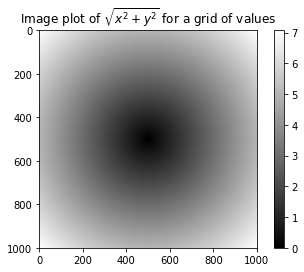

In [39]:
plt.show()

## Expressing Conditional Logic as Array Operations

In [40]:
# create a boolean array and two arrays of values
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

If we wanted to __take a value from xarr whenever the corresponding value in cond is True__ otherwise take the value from yarr

In [42]:
# list comprehension
result = [(x if c else y)
   for x, y, c in zip(xarr, yarr, cond)]

In [43]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems
1. it will not be very fast for large arrays (because all the work is being done in pure Python)
2.  it will not work with multidimensional arrays.

In [44]:
# how numpy helps, where
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

- The second and third arguments to np.where don’t need to be arrays
- one or both of them can be scalars
- A typical use of where in data analysis is to produce a new array of values based on another array

__Task:__
- Suppose you had a matrix of randomly generated data and you wanted to replace all positive values with 2 and all negative values with -2. This is very easy to do with np.where:

In [45]:
arr = random.randn(4,4)
arr

array([[ 0.13968909, -0.7066909 ,  0.89112591,  0.27084536],
       [-0.68018634, -0.83113458,  0.5259082 ,  0.8990058 ],
       [-1.42441294,  0.39762408, -0.11430348, -0.68814527],
       [ 0.04497711, -0.06412556, -0.3278998 , -2.84664045]])

In [46]:
np.where(arr > 0, 2, -2)

array([[ 2, -2,  2,  2],
       [-2, -2,  2,  2],
       [-2,  2, -2, -2],
       [ 2, -2, -2, -2]])

In [47]:
# set only positive values to 2
np.where(arr > 0, 2, arr)

array([[ 2.        , -0.7066909 ,  2.        ,  2.        ],
       [-0.68018634, -0.83113458,  2.        ,  2.        ],
       [-1.42441294,  2.        , -0.11430348, -0.68814527],
       [ 2.        , -0.06412556, -0.3278998 , -2.84664045]])

- The arrays passed to where can be __more than just equal sizes array or scalers__.

- you can __use where to express more complicated logic__
consider this example where I have two boolean arrays, cond1 and cond2, and wish to assign a different value for each of the 4 possible pairs of boolean values:
- The following two are equivalent:

In [50]:
# # if written in pure python (cannot run)
# result = []
# i =10
# for i in range(n):
#     if cond1[i] and cond2[i]:
#         result.append(0)
#     elif cond1[i]:
#         result.append(1)
#     elif cond2[i]:
#         result.append(2)
#     else:
#         result.append(3)

In [ ]:
# # if written in numpy (cannot run)
# np.where(cond1 & cond2, 0,
#         np.where(cond1, 1,
#                 np.where(cond2,2,3)))

## Mathematical and Statistical Methods
- A set of mathematical functions which __compute statistics about an entire array__ or __about the data along an axis__ are accessible as array methods
- Aggregations (often called reductions) like sum, mean, and standard deviation std can either be used by __calling the array instance method__

In [55]:
# create normally-distributed data
arr = np.random.randn(5,4)
arr

array([[-0.40022677, -0.8025866 , -0.35851197,  0.90822855],
       [-3.00263912, -0.13936007, -1.44225919, -0.2811643 ],
       [-0.73604847, -0.30495942, -0.77175909,  1.06153573],
       [-0.63689127, -0.35495791, -0.18473006, -0.92272676],
       [-0.35670452,  0.9601446 ,  1.82276307, -0.35027587]])

In [56]:
# average
arr.mean()

-0.31465647148574855

In [57]:
# another way to average
np.mean(arr)

-0.31465647148574855

In [58]:
# sum
arr.sum()

-6.293129429714971

Functions like mean and sum __take an optional axis argument which computes the statistic over the given axis__, resulting in an array with one fewer dimension:

In [63]:
# axis = 1 is horizonal, axis = 0 is vertical
arr.mean(axis = 1)

array([-0.1632742 , -1.21635567, -0.18780781, -0.5248265 ,  0.51898182])

In [61]:
arr.sum(axis = 0)

array([-5.13251015, -0.6417194 , -0.93449725,  0.41559736])

Other methods like __cumsum__ and __cumprod__ do not aggregate, instead __producing an array of the intermediate results__:

In [66]:
arr = np.array([[0,1,2],[3,4,5],[6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [67]:
arr.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [68]:
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### Summary of basic array statistical methods

In [69]:
%%html
<img src='image/statistical_method.jpg', width: 50, height: 50>

## Methods for Boolean Arrays
- Boolean values are coerced to 1 (True) and 0 (False) in the above methods
- __sum__ is often used as a means of counting True values in a boolean array

In [71]:
arr = random.randn(100)
arr

array([-0.6939554 , -1.43131511, -0.15490467, -1.27349386,  1.62042254,
       -0.10620941,  0.66215644,  1.44207632,  1.62664566,  0.8709898 ,
        1.0019154 , -1.63121726, -0.15652955, -1.98152621,  1.19201076,
        0.51810594,  0.67326159, -0.03808117,  0.92421926, -0.32435424,
       -0.20644481, -0.35897864,  1.35172827,  0.4234057 , -0.06966271,
        0.53835296,  1.774977  , -0.30837614,  0.37135987,  1.49308099,
        1.61965979, -1.20693653, -1.01704712, -0.51149884,  0.82290071,
       -0.61877657, -0.71356262,  0.33943237, -0.50957795, -0.34150463,
        0.02676098, -0.5132987 ,  0.27200285, -1.64180606, -2.00363301,
        1.56144849,  0.34368898, -1.30150463, -0.9961163 , -0.92032427,
       -0.50437067, -0.42532387, -0.83433398, -0.25920936, -0.38184904,
        2.00812989,  0.26608435, -2.18362968,  0.9776392 ,  2.70664799,
       -0.57147528,  1.93352111,  0.30405155,  1.86439806, -0.95137135,
        1.26078558, -1.38773539, -0.12275481, -0.65667661, -0.33

In [72]:
(arr > 0).sum()

45

- There are two additional methods, any and all, useful especially for boolean arrays
- __any__ tests whether one or more values in an array is True
- __all__ checks if every value is True

In [73]:
bools = np.array([False, False, True, False])
bools

array([False, False,  True, False])

In [74]:
bools.any()

True

In [75]:
bools.all()

False

## Sorting
- NumPy arrays can be sorted in-place using the __sort method__

In [77]:
arr = random.randn(8)
arr

array([ 0.7347259 ,  0.49149294,  0.57598611,  0.39968591, -0.50383408,
       -1.39719429, -0.75151471,  1.23401697])

In [78]:
arr.sort()

In [79]:
arr

array([-1.39719429, -0.75151471, -0.50383408,  0.39968591,  0.49149294,
        0.57598611,  0.7347259 ,  1.23401697])

__Multidimensional arrays__ can have each 1D section of values sorted __in-place along an axis__ by passing the axis number to sort:

In [80]:
# create a multi-dimensioanl array
arr = random.randn(5,3)
arr

array([[ 0.8979787 , -1.01125681,  2.07086807],
       [-1.26853791,  1.4050243 ,  0.67613006],
       [ 0.50570454,  0.82995311,  1.33313185],
       [ 0.50069086, -0.12932005,  0.53183166],
       [ 1.51938908, -0.81999783,  0.61569056]])

In [81]:
# sort horizontally
arr.sort(1)

In [82]:
arr

array([[-1.01125681,  0.8979787 ,  2.07086807],
       [-1.26853791,  0.67613006,  1.4050243 ],
       [ 0.50570454,  0.82995311,  1.33313185],
       [-0.12932005,  0.50069086,  0.53183166],
       [-0.81999783,  0.61569056,  1.51938908]])

The top level method np.sort returns __a sorted copy of an array instead of modifying the array in place__.

## Unique and Other Set Logic
- NumPy has some basic set operations for one-dimensional ndarrays

In [83]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [84]:
# give out unique names
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [85]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
ints

array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [86]:
np.unique(ints)

array([1, 2, 3, 4])

Another function, __np.in1d,__ tests __membership of the values in one array in another__, __returning a boolean array__:

In [87]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
values

array([6, 0, 0, 3, 2, 5, 6])

In [88]:
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

In [89]:
%%html
<img src='image/set_function.jpg', width: 50, height: 50>

## File Input and Output with Arrays

### Storing Arrays on Disk in Binary Format
- __np.save__ and __np.load__ are the __two workhorse functions__ for efficiently saving and loading array data on disk.
- Arrays are saved __by default in an uncompressed raw binary format with file extension .npy__
- You __save multiple arrays__ in a zip archive using __np.savez__ and passing the arrays as keyword arguments:

In [90]:
# store arrays in binary format
arr = np.arange(10)
np.save('some_array', arr)

In [91]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [92]:
# load arrays in binary format
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
# saving multiple arrays in a zip archiv
np.savez('array_archive.npz', a=arr, b=arr)

In [94]:
# loading .npz file
arch = np.load('array_archive.npz')

In [95]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [96]:
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Saving and Loading Text Files
- I will focus mainly on the __read_csv and read_table functions in pandas__. It will at times be useful to __load data into vanilla NumPy arrays using np.loadtxt or the more specialized np.genfromtxt__.

In [99]:
# loaded into a 2D array
arr = np.loadtxt('array.ex.txt', delimiter=',')
arr

array([[ 0.580052,  0.18673 ,  1.040717,  1.134411],
       [ 0.194163, -0.636917, -0.938659,  0.124094],
       [-0.12641 ,  0.268607, -0.695724,  0.047428],
       [-1.484413,  0.004176, -0.744203,  0.005487],
       [ 2.302869,  0.200131,  1.670238, -1.88109 ],
       [-0.19323 ,  1.047233,  0.482803,  0.960334]])

## Linear Algebra
- there is a function dot, both an array method, and a function in the numpy namespace, for matrix multiplication

In [104]:
x = np.array([[1.,2.,3.],[4.,5.,6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [105]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [106]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [107]:
# equivalent np.dot(x,y)
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a 2D array and a suitably sized 1D array results in a 1D array:

In [108]:
np.dot(x,np.ones(3))

array([ 6., 15.])

- __numpy.linalg__ has a standard set of matrix decompositions and things like inverse and determinant

In [110]:
from numpy.linalg import inv, qr

In [111]:
x = random.randn(5,5)
x

array([[ 0.80633769,  0.58239959, -0.50633622, -0.03369622,  0.23032716],
       [ 1.08823511,  1.71131407,  0.56343789, -0.31779811,  0.38018184],
       [ 1.50457967,  1.59970304, -1.03412187,  1.40566637,  0.54010255],
       [-0.86959846, -1.31177518,  0.68991474,  0.93432945, -0.48731415],
       [-1.09679936, -2.00730224, -0.74376851, -0.61960146, -0.58714954]])

In [113]:
mat = x.T.dot(x)
mat

array([[ 6.05736645,  8.08112897, -1.13522781,  1.60901447,  2.47982889],
       [ 8.08112897, 11.57685137, -0.39700356,  1.70326892,  3.46658986],
       [-1.13522781, -0.39700356,  2.67242063, -0.5101805 , -0.36044787],
       [ 1.60901447,  1.70326892, -0.5101805 ,  3.3349065 ,  0.53910852],
       [ 2.47982889,  3.46658986, -0.36044787,  0.53910852,  1.07151926]])

In [114]:
inv(mat)

array([[ 11.15281821, -12.38231158,   4.92634539,  -0.9518274 ,
         16.38434755],
       [-12.38231158,  21.5168608 ,  -7.83108095,   0.90689879,
        -44.04562073],
       [  4.92634539,  -7.83108095,   3.29136402,  -0.33222102,
         15.20842524],
       [ -0.9518274 ,   0.90689879,  -0.33222102,   0.41510854,
         -1.05179069],
       [ 16.38434755, -44.04562073,  15.20842524,  -1.05179069,
        111.15674946]])

In [115]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -1.30193428e-14,  7.68899144e-15,
         7.13564988e-16,  5.68434189e-14],
       [ 4.98727386e-15,  1.00000000e+00, -7.00398401e-15,
         1.17192478e-15,  0.00000000e+00],
       [ 4.74792378e-15, -4.13254312e-15,  1.00000000e+00,
        -5.46403171e-17,  0.00000000e+00],
       [-3.37202008e-15,  2.19592971e-15, -1.07730359e-15,
         1.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -3.55271368e-15,
         0.00000000e+00,  1.00000000e+00]])

In [116]:
q, r = qr(mat)
r

array([[-1.05841180e+01, -1.45777108e+01,  1.40146499e+00,
        -2.90933139e+00, -4.43768674e+00],
       [ 0.00000000e+00, -1.37639488e+00, -2.52886565e+00,
         1.40845691e+00, -1.86401705e-01],
       [ 0.00000000e+00,  0.00000000e+00, -7.86846372e-01,
        -2.38570195e+00,  8.65217331e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.01145553e+00, -1.21636144e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.22086900e-03]])

### Summary of linear algebra functions

In [117]:
%%html
<img src='image/linear_algebra_function.jpg', width: 50, height: 50>

## Random Number Generation
-  generating whole arrays of sample values from many kinds of probability distribution

In [120]:
# 4 by 4 array of samples from the standard normal distribution using normal
samples = np.random.normal(size=(4,4))
samples

array([[ 0.09320952,  0.66269987,  0.0753601 , -0.26284505],
       [-0.15948048, -1.06183988, -1.5446649 ,  0.58688058],
       [-0.08253277, -0.86309722, -1.08902742,  0.81208522],
       [-0.8236803 , -0.47283956,  1.21379749,  2.20913825]])

Comparing with python, __numpy.random is well over an order of magnitude faster for generating very large samples__

### Summary of numpy.random function

In [126]:
%%html
<img src='image/random_function.jpg', width: 50, height: 50>

## Example: Random Walks
- . Let’s first consider a simple random walk starting at 0 with steps of 1 and -1 occurring with equal probability.
- A pure Python way to implement a single random walk with 1,000 steps using the built-in random module:

In [128]:
# Python way to implement a single random walk with 1,000 steps
import random
position = 0
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

In [129]:
# numpy way
nsteps = 1000
draws = np.random.randint(0,2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()